## Saving data from 2019 onwards as a separate file

In [1]:
import pandas as pd

In [84]:
#Original dataset not included in repo as it is too large
df = pd.read_csv("Hourly_Traffic_on_Metropolitan_Transportation_Authority__MTA__Bridges_and_Tunnels__Beginning_2010.csv")

In [7]:
# Converting Date to Date-time
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-10-01,0,I,2515,530
1,21,2022-10-01,1,I,1534,346
2,21,2022-10-01,2,I,1161,261
3,21,2022-10-01,3,I,1125,291
4,21,2022-10-01,4,I,1274,282
...,...,...,...,...,...,...
1957007,11,2010-01-01,19,I,2675,1152
1957008,11,2010-01-01,20,I,2580,1086
1957009,11,2010-01-01,21,I,2302,987
1957010,11,2010-01-01,22,I,2170,910


In [9]:
df1 = df[(df['Date'] > '2018-12-31')]

In [11]:
#data written to output directory
df1.to_csv("../output/Traffic_Volume_2019_onwards.csv",index=False)

# Analysis

In [2]:
df = pd.read_csv("../output/Traffic_Volume_2019_onwards.csv")

In [101]:
df['Date'] = pd.to_datetime(df['Date'])

In [102]:
df["Volume"] = df["# Vehicles - E-ZPass"] + df["# Vehicles - VToll"]

## Aggregating vehicle count for New York City

In [104]:
df1 = df.drop(['# Vehicles - E-ZPass', '# Vehicles - VToll','Direction',"Hour","Plaza ID"], axis=1)

In [105]:
df1 = df1.resample('M', on='Date').sum()

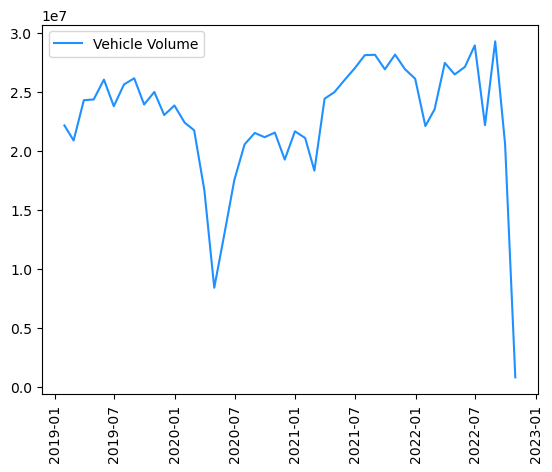

In [153]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Plot a simple line chart
# plt.plot(df["severity_injuries"], color='g', label='Line y')


# Plot another line on the same chart/graph
plt.plot(df1["Volume"], color='dodgerblue', label='Vehicle Volume')
plt.xticks(rotation = 90)


plt.legend()
plt.show()

## Aggregating vehicle count at Borough level

In [108]:
df

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Volume
0,21,2022-10-01,0,I,2515,530,3045
1,21,2022-10-01,1,I,1534,346,1880
2,21,2022-10-01,2,I,1161,261,1422
3,21,2022-10-01,3,I,1125,291,1416
4,21,2022-10-01,4,I,1274,282,1556
...,...,...,...,...,...,...,...
564525,30,2019-01-01,19,O,4377,611,4988
564526,30,2019-01-01,20,O,3839,485,4324
564527,30,2019-01-01,21,O,3200,410,3610
564528,30,2019-01-01,22,O,2569,348,2917


In [117]:
M1 = df[(df['Plaza ID'] == 21) & (df['Direction'] == "I")]

In [118]:
Q1 = df[(df['Plaza ID'] == 21) & (df['Direction'] == "I")]

In [119]:
X1 = df[(df['Plaza ID'] == 21) & (df['Direction'] == "I")]

In [120]:
Q2 = df[(df['Plaza ID'] == 22) & (df['Direction'] == "O")]

In [121]:
X2 = df[(df['Plaza ID'] == 22) & (df['Direction'] == "O")]

In [122]:
X3 = df[(df['Plaza ID'] == 23) & (df['Direction'] == "I")]

In [123]:
Q3 = df[(df['Plaza ID'] == 23) & (df['Direction'] == "O")]

In [124]:
M2 = df[(df['Plaza ID'] == 24) & (df['Direction'] == "I")]

In [125]:
X4 = df[(df['Plaza ID'] == 24) & (df['Direction'] == "O")]

In [126]:
K1 = df[(df['Plaza ID'] == 25) & (df['Direction'] == "O")]

In [127]:
Q4 = df[(df['Plaza ID'] == 26) & (df['Direction'] == "O")]

In [128]:
M3 = df[(df['Plaza ID'] == 27) & (df['Direction'] == "I")]

In [130]:
Q5 = df[(df['Plaza ID'] == 27) & (df['Direction'] == "O")]

In [129]:
M4 = df[(df['Plaza ID'] == 28) & (df['Direction'] == "I")]

In [131]:
K2 = df[(df['Plaza ID'] == 28) & (df['Direction'] == "O")]

In [132]:
X5 = df[(df['Plaza ID'] == 29) & (df['Direction'] == "I")]

In [133]:
Q6 = df[(df['Plaza ID'] == 29) & (df['Direction'] == "O")]

In [134]:
S1 = df[(df['Plaza ID'] == 30) & (df['Direction'] == "I")]

In [135]:
K3 = df[(df['Plaza ID'] == 30) & (df['Direction'] == "O")]

In [140]:
# Merging datasets:

# Manhattan:
Mdf = pd.concat([M1, M2, M3, M4])

# Queens:
Qdf = pd.concat([Q1, Q2, Q3, Q4, Q5, Q6])

# Brooklyn:
Kdf = pd.concat([K1, K2, K3])

# Bronx
Xdf = pd.concat([X1, X2, X3, X4, X5])

# Staten Island
Sdf = S1

In [142]:
# Merging data monthwise

Mdf = Mdf.resample('M', on='Date').sum()
Qdf = Qdf.resample('M', on='Date').sum()
Kdf = Kdf.resample('M', on='Date').sum()
Xdf = Xdf.resample('M', on='Date').sum()
Sdf = Sdf.resample('M', on='Date').sum()

C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_17920\2683924965.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mdf = Mdf.resample('M', on='Date').sum()
C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_17920\2683924965.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Qdf = Qdf.resample('M', on='Date').sum()
C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_17920\2683924965.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

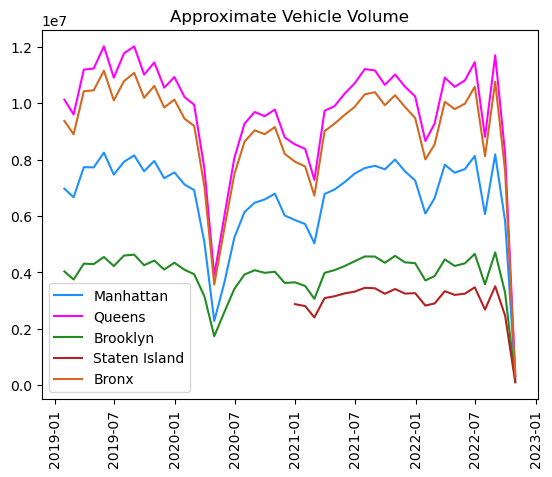

In [148]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Plot a simple line chart
# plt.plot(df["severity_injuries"], color='g', label='Line y')


plt.title("Approximate Vehicle Volume")

plt.plot(Mdf["Volume"], color='dodgerblue', label='Manhattan')
plt.plot(Qdf["Volume"], color='magenta', label='Queens')
plt.plot(Kdf["Volume"], color='forestgreen', label='Brooklyn')
plt.plot(Sdf["Volume"], color='firebrick', label='Staten Island')
plt.plot(Xdf["Volume"], color='chocolate', label='Bronx')
plt.xticks(rotation = 90)

plt.legend(loc='lower left')
plt.show()